In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside notebook
%matplotlib inline


# 🌊 AI-ML Project: Urban Flood & Oil Spill Risk Prediction

This project focuses on predicting **urban flood risks** by combining **natural factors** (rainfall, soil, climate change) and **man-made factors** (urbanization, poor drainage, oil spills, infrastructure issues).


## 📝 Problem Statement

Urban pluvial flooding is caused not only by **natural factors** such as heavy rainfall, soil saturation, and changing climate patterns, but also by **man-made drivers** like unplanned urbanization, poor drainage systems, and blocked sewage lines.  

Additionally, **industrial oil spills and leakages** intensify the flooding impact by clogging drainage systems, contaminating water bodies, and slowing down recovery efforts.  

There is an urgent need for a **Machine Learning-based solution** that integrates both **natural (rainfall, soil, climate)** and **man-made (drainage, oil spills, infrastructure)** factors to predict urban flood risks accurately.  

Such a system would help **city planners, policymakers, and disaster management authorities** in proactive decision-making, minimizing both human and environmental losses.


## 🎯 Objectives

1. To analyze natural (rainfall, soil, climate) and man-made (urbanization, drainage, oil spills) factors contributing to urban flooding.  
2. To preprocess and clean real-world datasets for training Machine Learning models.  
3. To apply classification/regression algorithms for predicting flood risk levels.  
4. To validate and compare model performance using accuracy and error metrics.  
5. To provide actionable insights for **urban planners and disaster management authorities**.  


## 📊 Dataset Information

- **Dataset Name**: Urban Pluvial Flood Risk Dataset  
- **Format**: CSV  
- **Key Features**:  
  - `Segment_ID` → Urban segment reference  
  - `Rainfall` → Rainfall intensity (mm/hr)  
  - `Soil_Type` → Soil absorption capacity  
  - `Land_Use` → Urban / Industrial / Residential zones  
  - `Drainage_Capacity` → Condition of drainage infrastructure  
  - `Oil_Spill` → Presence of industrial oil leakage (Yes/No)  
  - `Flood_Risk_Level` → Target variable (Low, Medium, High)  


In [2]:
# Load the dataset
df = pd.read_csv("urban_pluvial_flood_risk_dataset.csv")

# Quick info
print("Dataset Shape:", df.shape)
print("\nColumns in dataset:\n", df.columns)

# Display first 5 rows
df.head(10)


Dataset Shape: (2963, 17)

Columns in dataset:
 Index(['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude',
       'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group',
       'drainage_density_km_per_km2', 'storm_drain_proximity_m',
       'storm_drain_type', 'rainfall_source',
       'historical_rainfall_intensity_mm_hr', 'return_period_years',
       'risk_labels'],
      dtype='object')


segment_id             city_name      admin_ward   latitude   longitude  \
0  SEG-00001    Colombo, Sri Lanka    Borough East   6.920633   79.912600   
1  SEG-00002        Chennai, India          Ward D  13.076487   80.281774   
2  SEG-00003      Ahmedabad, India       Sector 12  23.019473   72.638578   
3  SEG-00004      Hong Kong, China       Sector 14  22.302602  114.078673   
4  SEG-00005  Durban, South Africa        Sector 5 -29.887602   30.911008   
5  SEG-00006     Bangkok, Thailand  Borough Harbor  13.730254  100.441634   
6  SEG-00007        Nairobi, Kenya          Ward J  -1.374024   36.730491   
7  SEG-00008     Bangkok, Thailand          Zone X  13.746372  100.484051   
8  SEG-00009    Washington DC, USA       Sector 12  38.870843  -76.900953   
9  SEG-00010     Vancouver, Canada        Sector 5  49.394900 -123.199393   

  catchment_id  elevation_m               dem_source       land_use  \
0      CAT-136          NaN     Copernicus_EEA-10_v5  Institutional   
1      CAT-049        -2.19     Copernicus_EEA-10_v5    Residential   
2      CAT-023        30.88                SRTM_3arc     Industrial   
3      CAT-168        24.28                SRTM_3arc    Residential   
4      CAT-171        35.70                SRTM_3arc     Industrial   
5      CAT-132        15.36  Copernicus_GLO-30_v2023          Roads   
6      CAT-112        15.80  Copernicus_GLO-30_v2023    Residential   
7      CAT-116        20.08                SRTM_1arc    Residential   
8      CAT-095         0.19  Copernicus_GLO-90_v2022     Commercial   
9      CAT-066        19.05                SRTM_3arc     Commercial   

  soil_group  drainage_density_km_per_km2  storm_drain_proximity_m  \
0        NaN                         4.27                    160.5   
1          D                         7.54                      NaN   
2          B                        11.00                    152.5   
3          B                         7.32                     37.0   
4          C                         4.50                    292.4   
5          C                         8.97                     30.0   
6          A                         8.25                     43.0   
7          C                         5.88                     31.1   
8        NaN                         7.79                    153.3   
9          D                          NaN                     49.7   

  storm_drain_type rainfall_source  historical_rainfall_intensity_mm_hr  \
0        CurbInlet            ERA5                                 39.4   
1      OpenChannel            ERA5                                 56.8   
2      OpenChannel             IMD                                 16.3   
3          Manhole            ERA5                                 77.0   
4      OpenChannel            ERA5                                 20.8   
5          Manhole      LocalGauge                                120.5   
6          Manhole      LocalGauge                                 39.3   
7        CurbInlet            ERA5                                 74.5   
8              NaN            ERA5                                 58.2   
9      GratedInlet            ERA5                                 20.1   

   return_period_years                                 risk_labels  
0                   50                                     monitor  
1                   25  ponding_hotspot|low_lying|event_2025-05-02  
2                    5                                     monitor  
3                   10                                     monitor  
4                    5                                     monitor  
5                   50                        extreme_rain_history  
6                   10                                     monitor  
7                   10                                     monitor  
8                   10                  low_lying|event_2024-02-14  
9                    5                                     monitor

In [3]:
# Summary statistics for numerical columns
df.describe()

latitude    longitude  elevation_m  drainage_density_km_per_km2  \
count  2963.000000  2963.000000  2802.000000                  2679.000000   
mean     19.399103    31.676123    37.689818                     6.290866   
std      24.446320    79.542482    38.708958                     2.187365   
min     -36.999038  -123.292949    -3.000000                     1.270000   
25%       6.580006   -43.124581     8.725000                     4.670000   
50%      23.760802    36.889173    25.130000                     6.250000   
75%      37.887422   101.701136    59.620000                     7.830000   
max      55.821219   174.911271   266.700000                    12.070000   

       storm_drain_proximity_m  historical_rainfall_intensity_mm_hr  \
count              2724.000000                          2963.000000   
mean                123.202203                            43.811441   
std                 107.764541                            25.221200   
min                   0.200000                             5.400000   
25%                  47.975000                            25.800000   
50%                  91.700000                            37.900000   
75%                 162.625000                            55.550000   
max                 751.700000                           150.000000   

       return_period_years  
count          2963.000000  
mean             19.730003  
std              25.182883  
min               2.000000  
25%               5.000000  
50%              10.000000  
75%              25.000000  
max             100.000000

In [4]:
import os
os.getcwd()

'C:\\Users\\shash\\flood project'

In [5]:
# Basic info about datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

In [6]:

# Summary statistics for numeric columns
df.describe()

latitude    longitude  elevation_m  drainage_density_km_per_km2  \
count  2963.000000  2963.000000  2802.000000                  2679.000000   
mean     19.399103    31.676123    37.689818                     6.290866   
std      24.446320    79.542482    38.708958                     2.187365   
min     -36.999038  -123.292949    -3.000000                     1.270000   
25%       6.580006   -43.124581     8.725000                     4.670000   
50%      23.760802    36.889173    25.130000                     6.250000   
75%      37.887422   101.701136    59.620000                     7.830000   
max      55.821219   174.911271   266.700000                    12.070000   

       storm_drain_proximity_m  historical_rainfall_intensity_mm_hr  \
count              2724.000000                          2963.000000   
mean                123.202203                            43.811441   
std                 107.764541                            25.221200   
min                   0.200000                             5.400000   
25%                  47.975000                            25.800000   
50%                  91.700000                            37.900000   
75%                 162.625000                            55.550000   
max                 751.700000                           150.000000   

       return_period_years  
count          2963.000000  
mean             19.730003  
std              25.182883  
min               2.000000  
25%               5.000000  
50%              10.000000  
75%              25.000000  
max             100.000000

In [7]:
# Missing values check
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

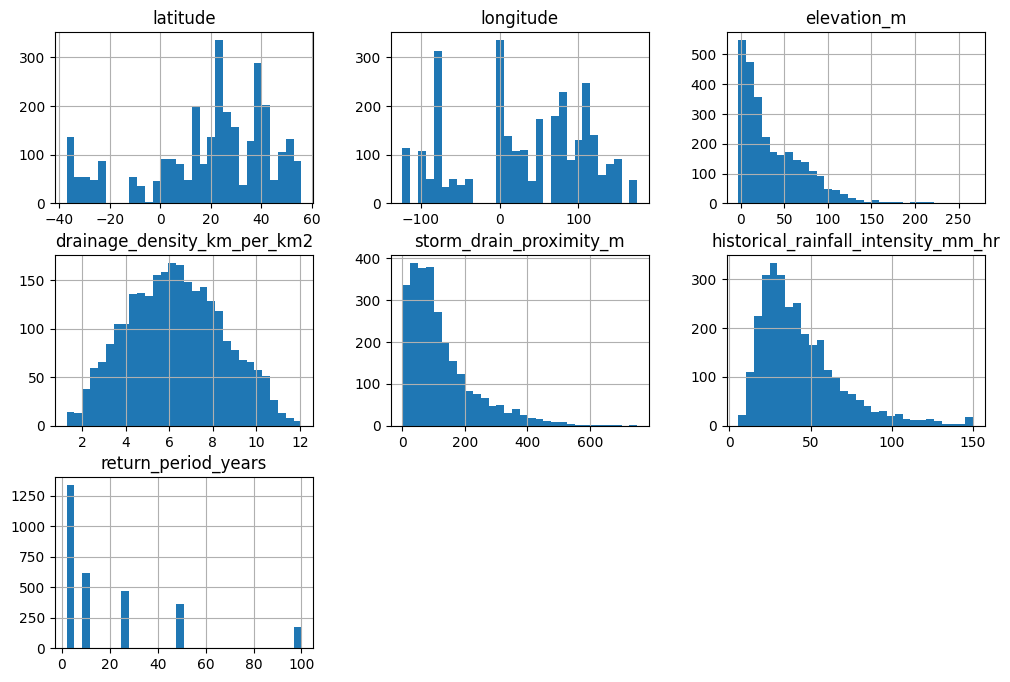

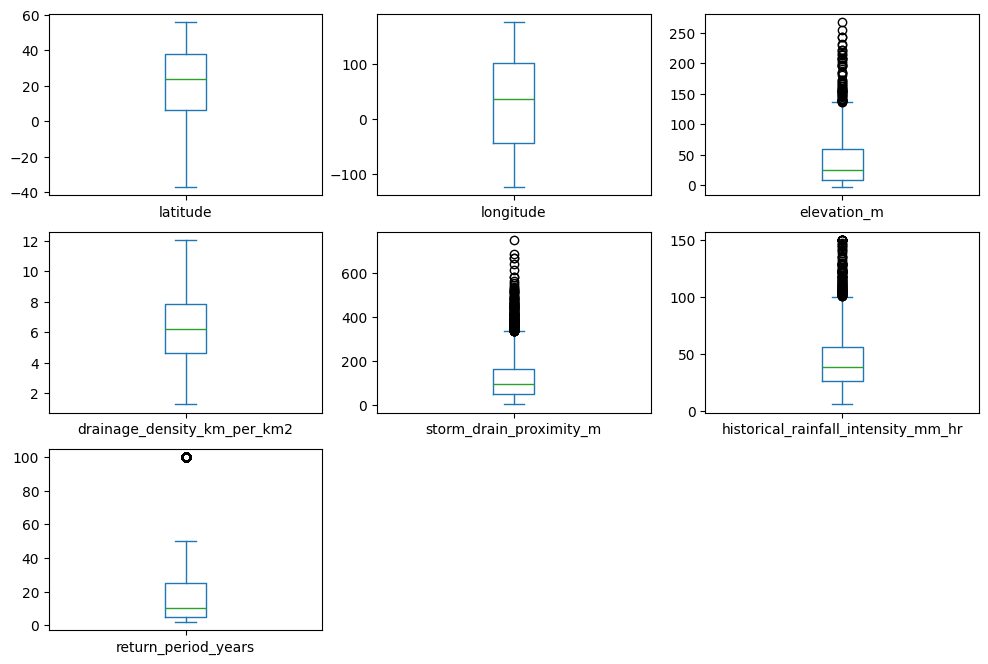

In [8]:
# Histogram for all numeric columns
df.hist(figsize=(12,8), bins=30)
plt.show()

# Boxplot for numeric columns (outlier detection)
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))
plt.show()


In [9]:
df.select_dtypes(exclude=[np.number]).columns


Index(['segment_id', 'city_name', 'admin_ward', 'catchment_id', 'dem_source',
       'land_use', 'soil_group', 'storm_drain_type', 'rainfall_source',
       'risk_labels'],
      dtype='object')

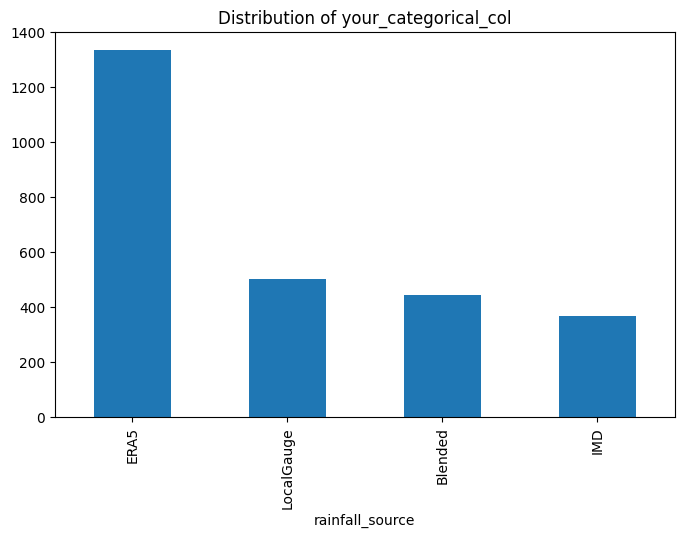

In [10]:
# Example: replace 'your_categorical_col' with actual name
df['rainfall_source'].value_counts().plot(
    kind='bar', figsize=(8,5))
plt.title("Distribution of your_categorical_col")
plt.show()


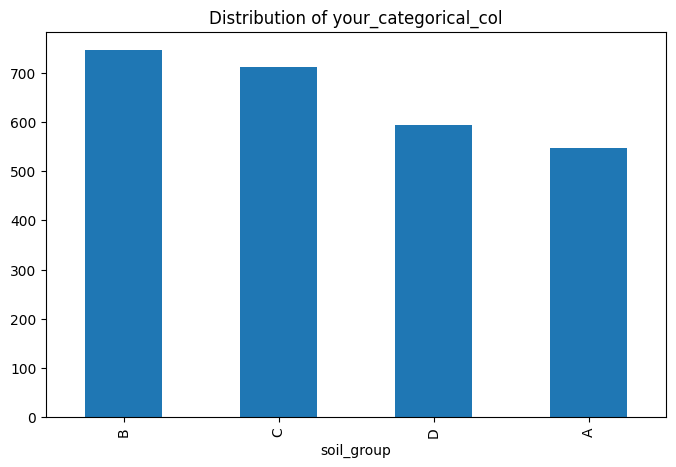

In [11]:
# Example: replace 'your_categorical_col' with actual name
df['soil_group'].value_counts().plot(
    kind='bar', figsize=(8,5))
plt.title("Distribution of your_categorical_col")
plt.show()


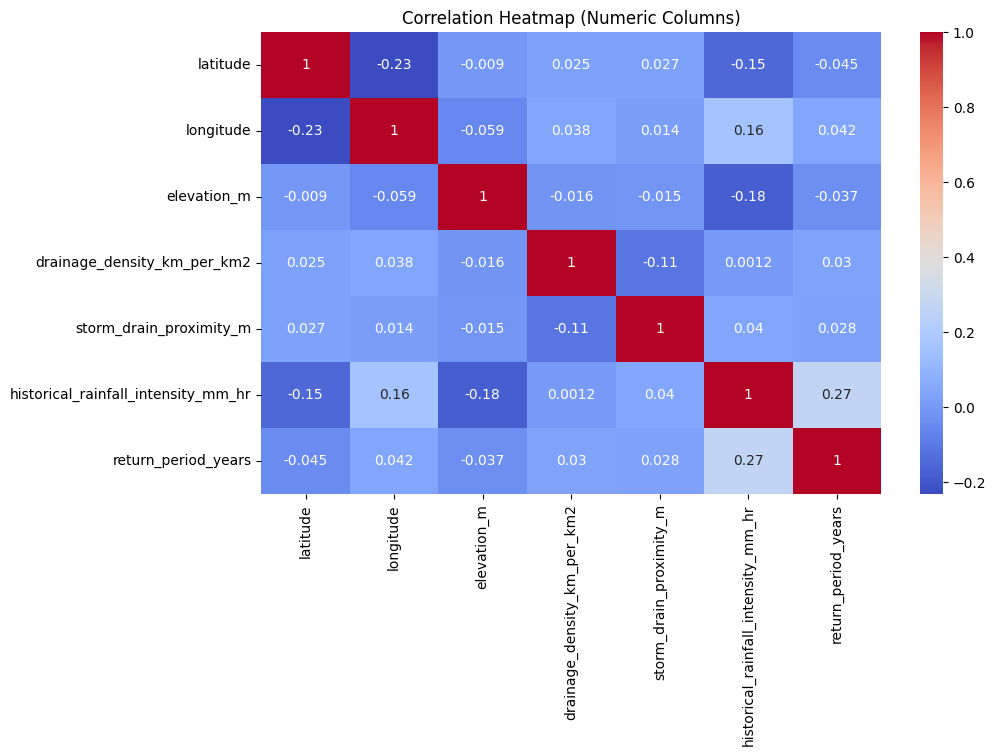

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


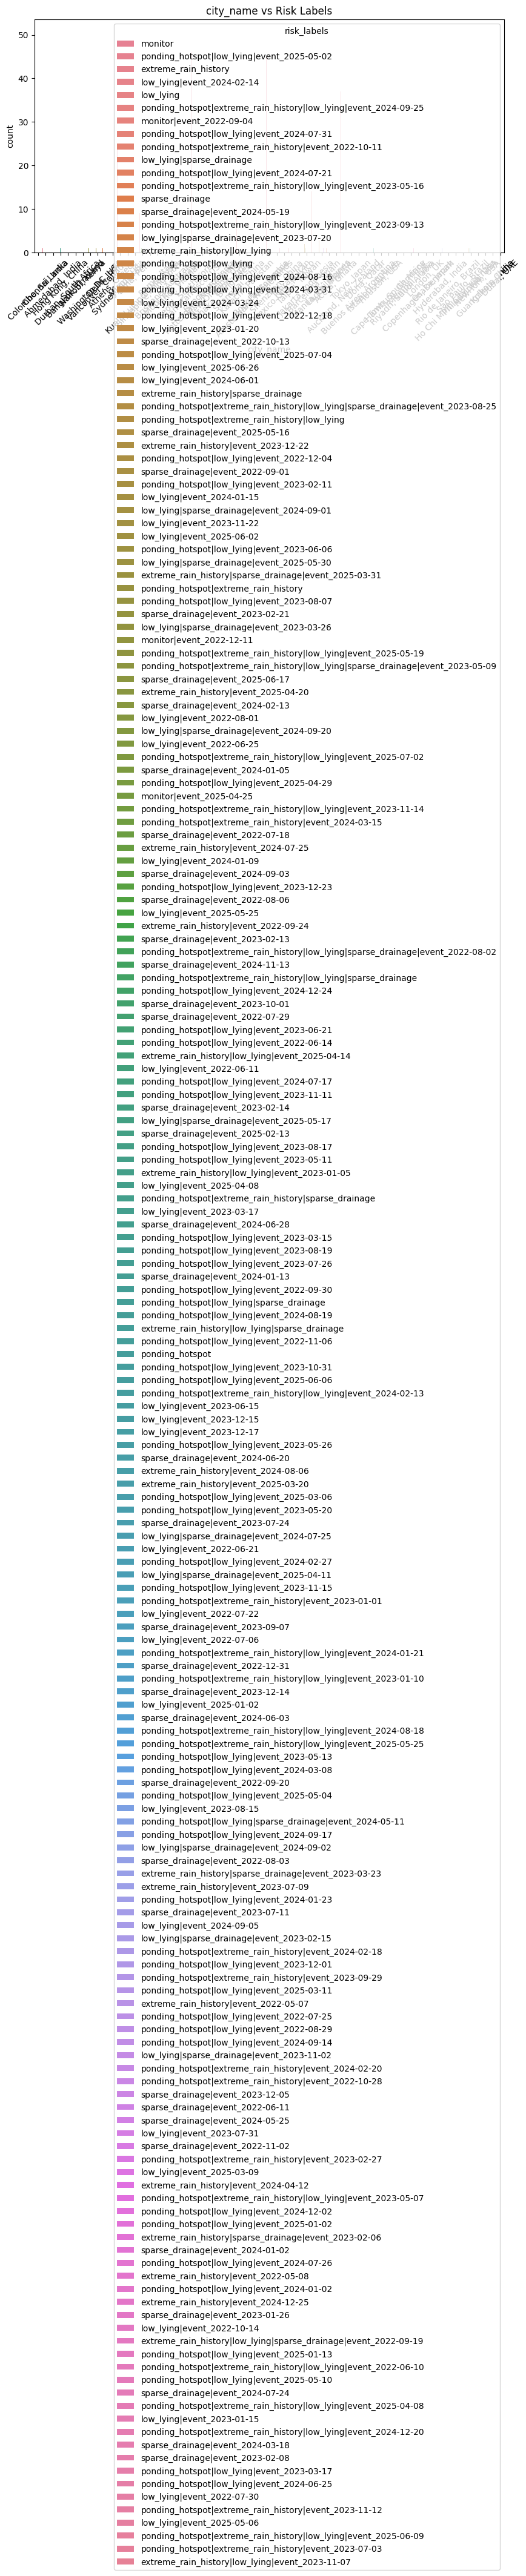

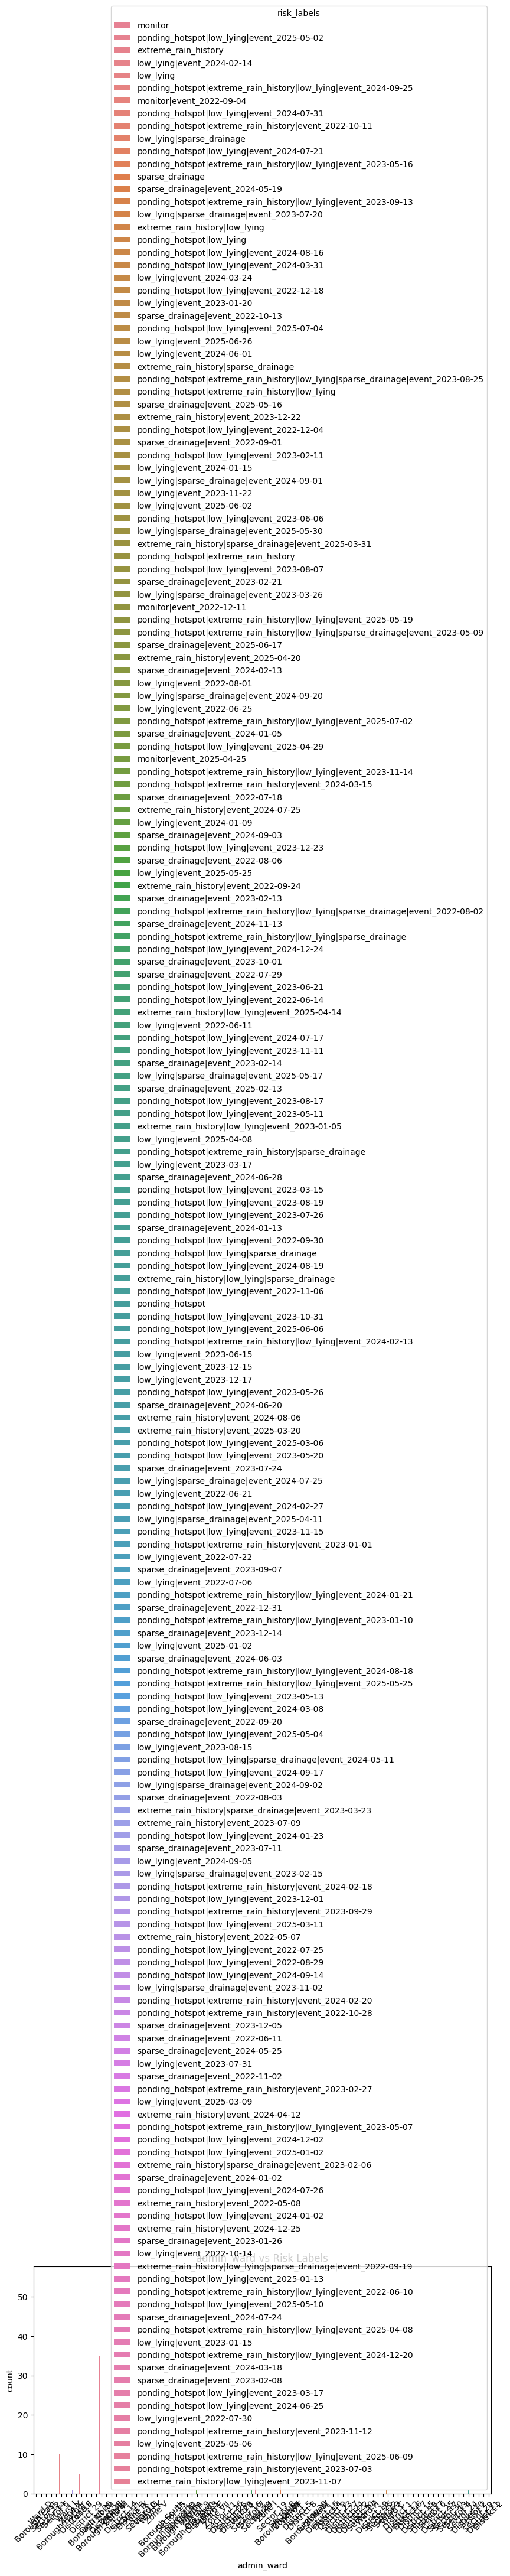

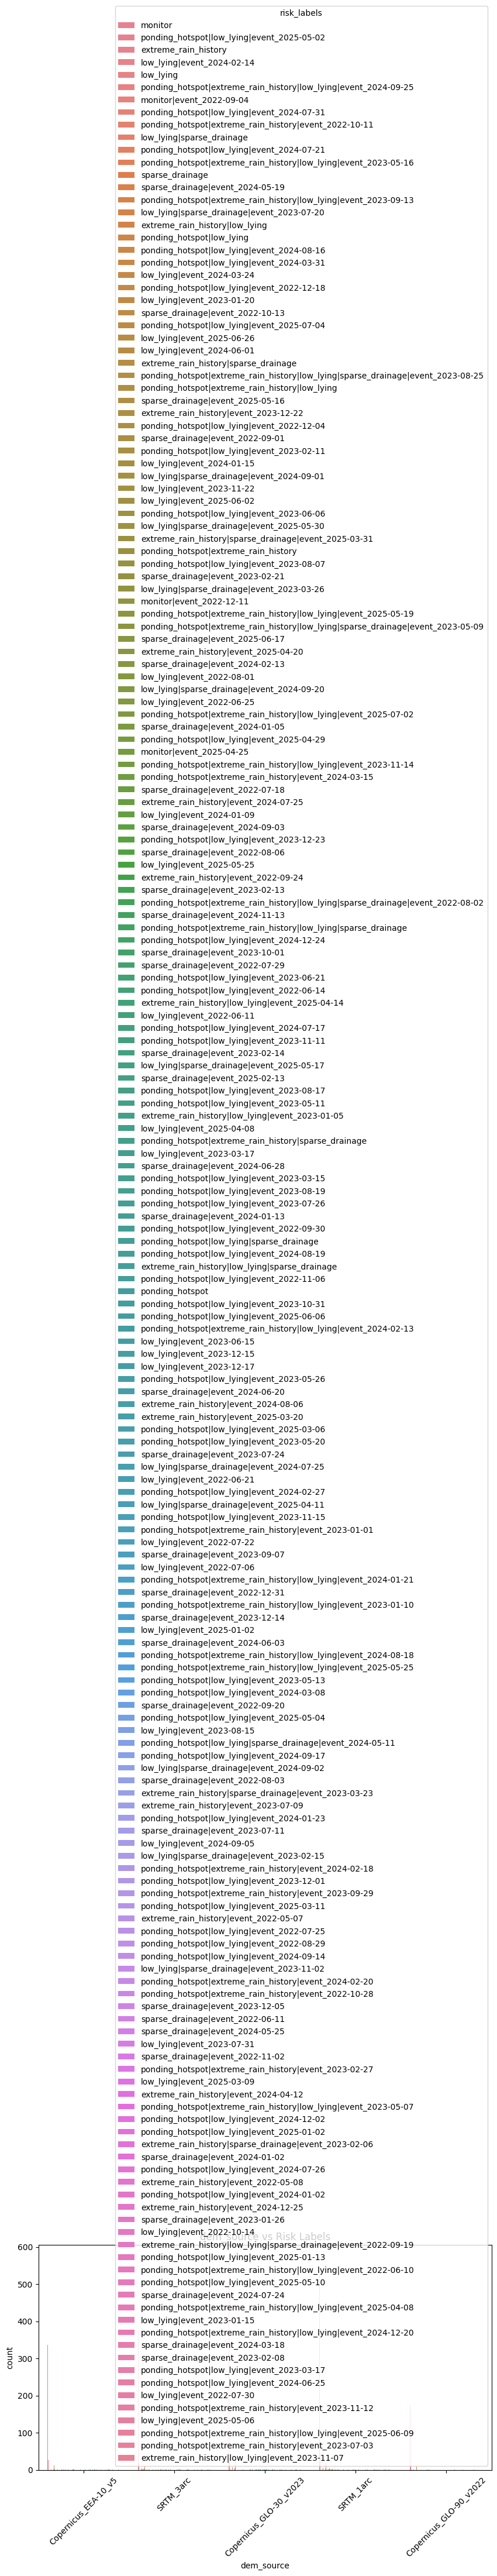

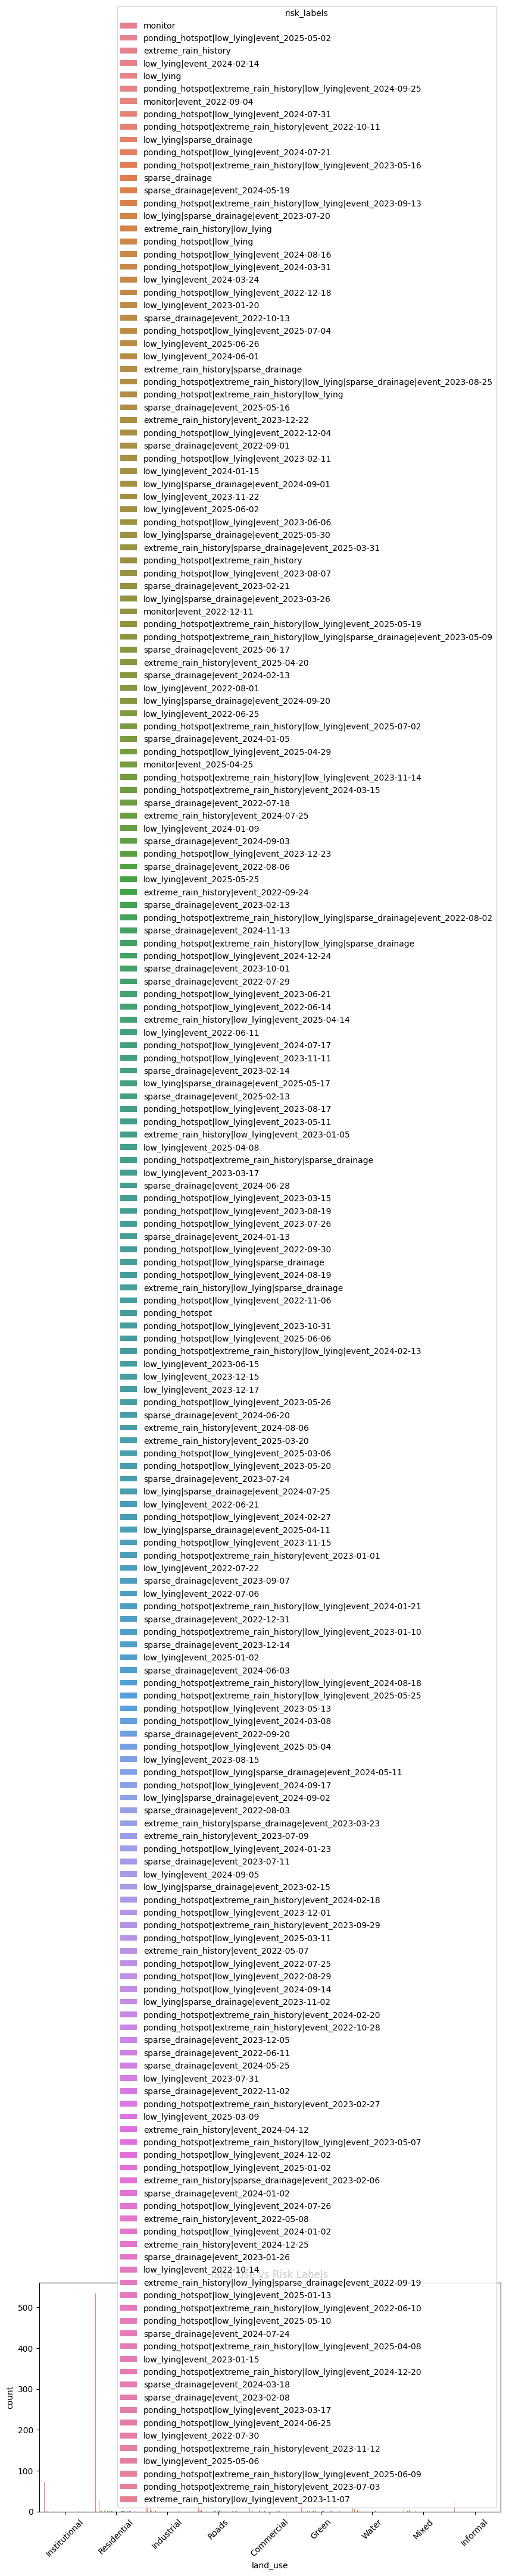

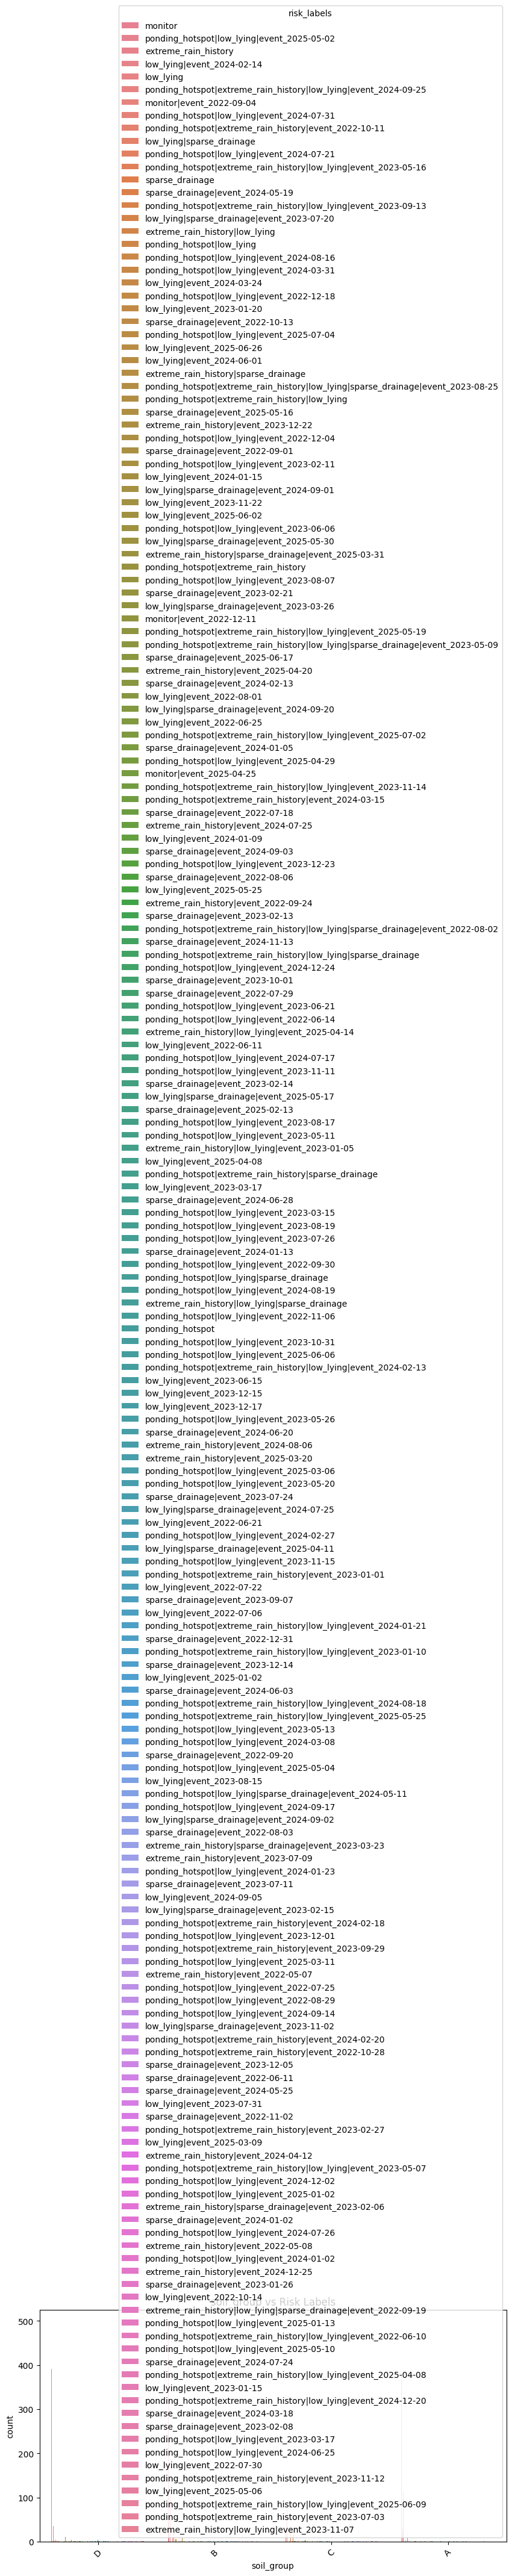

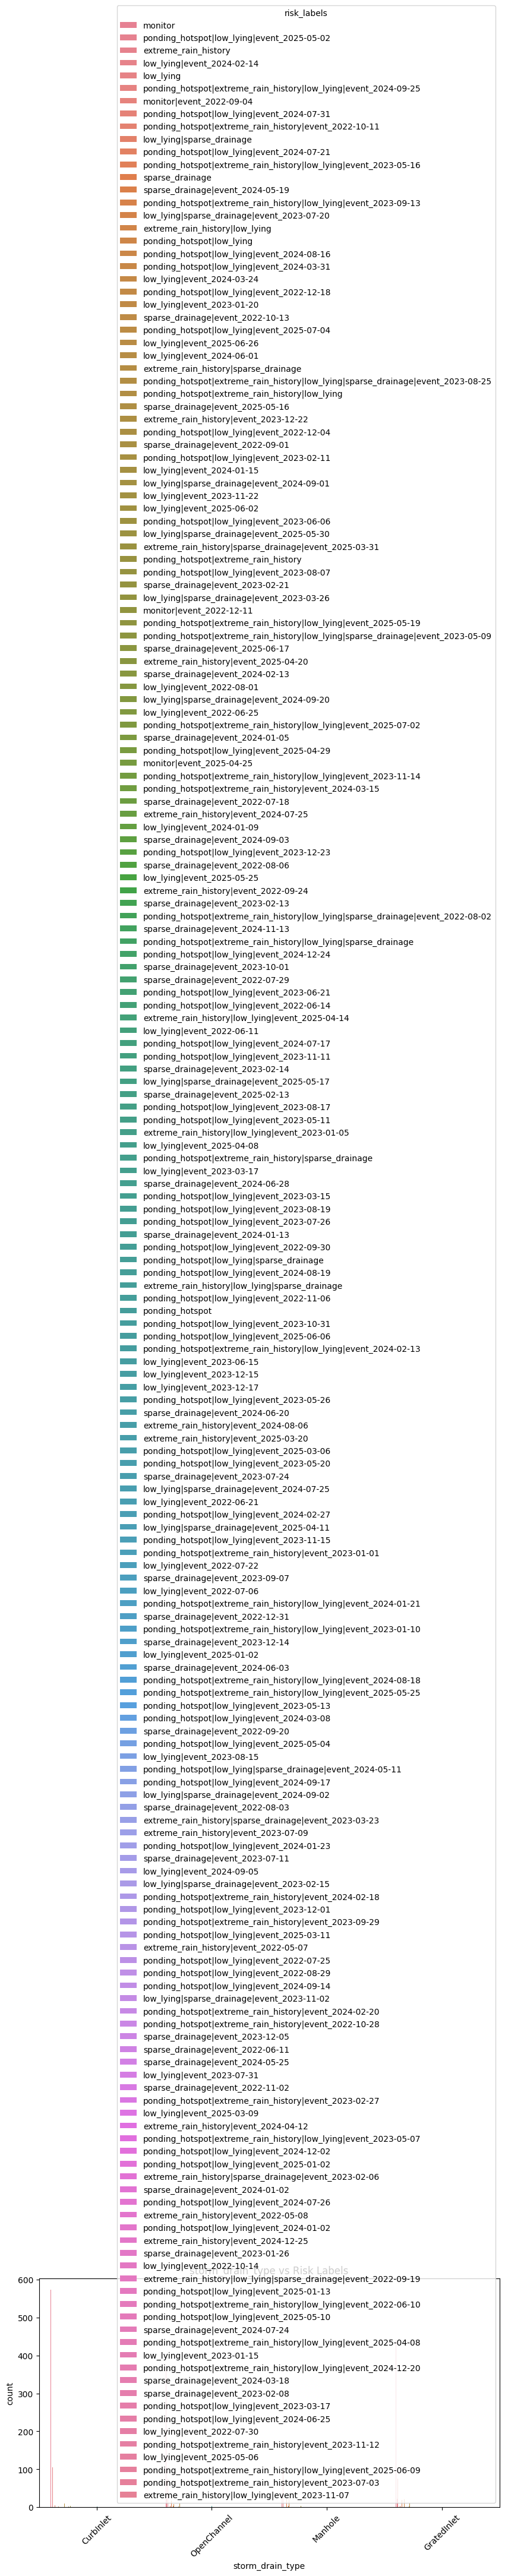

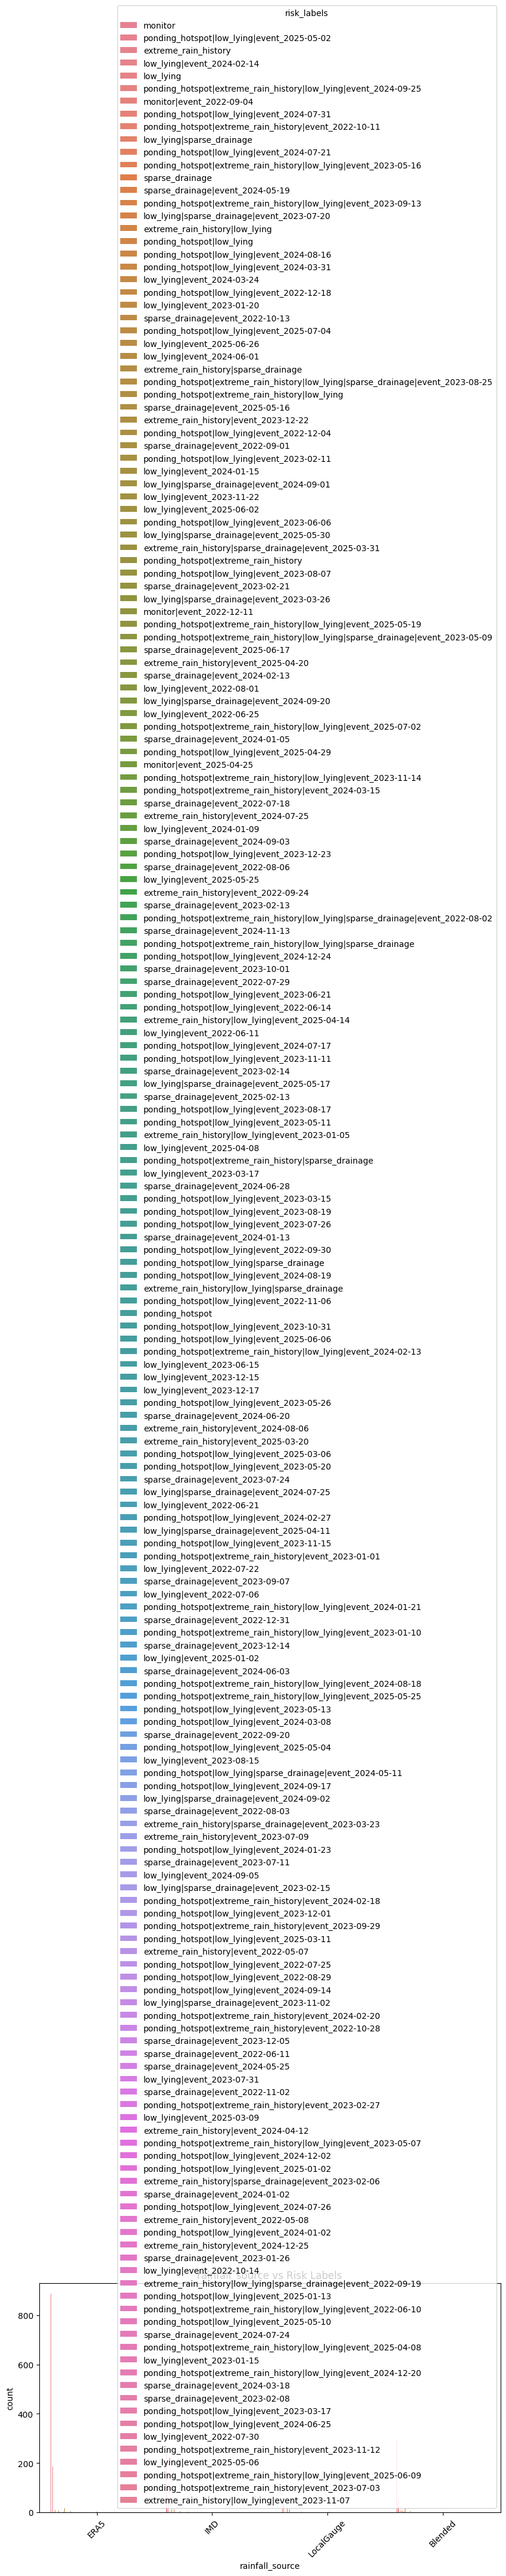

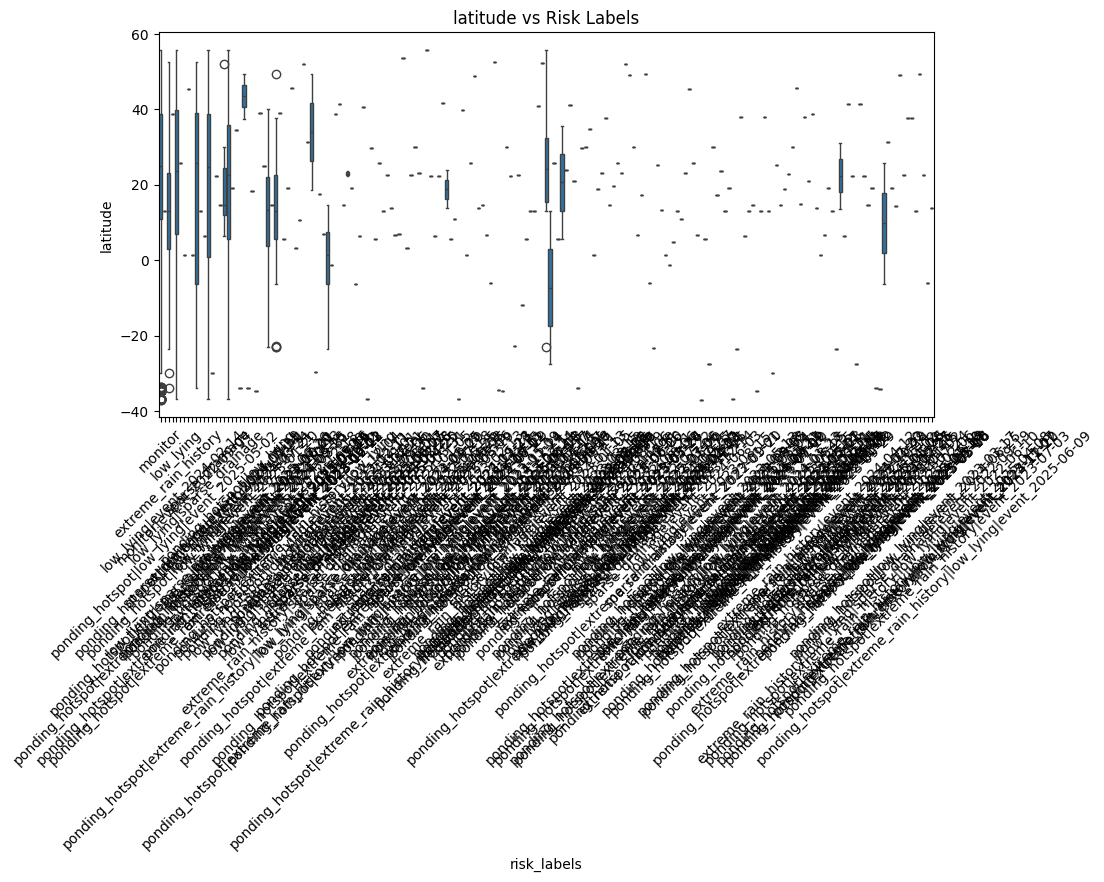

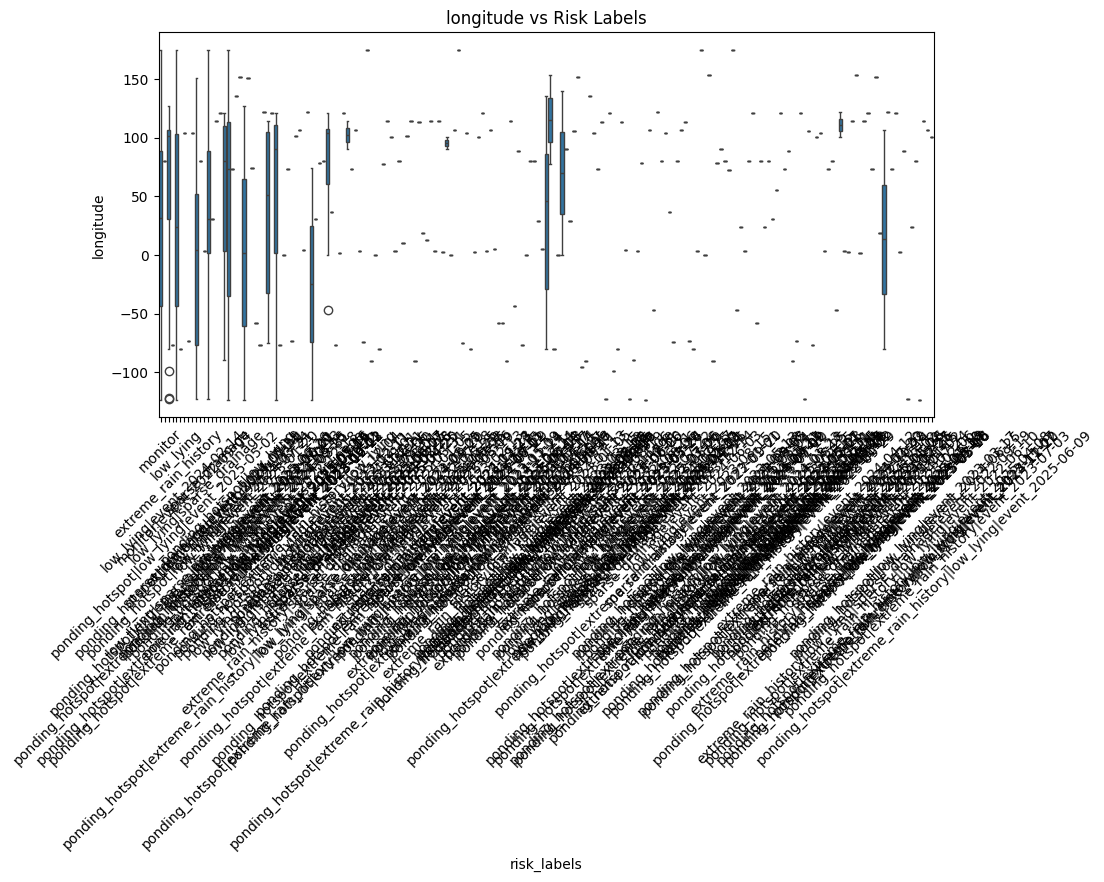

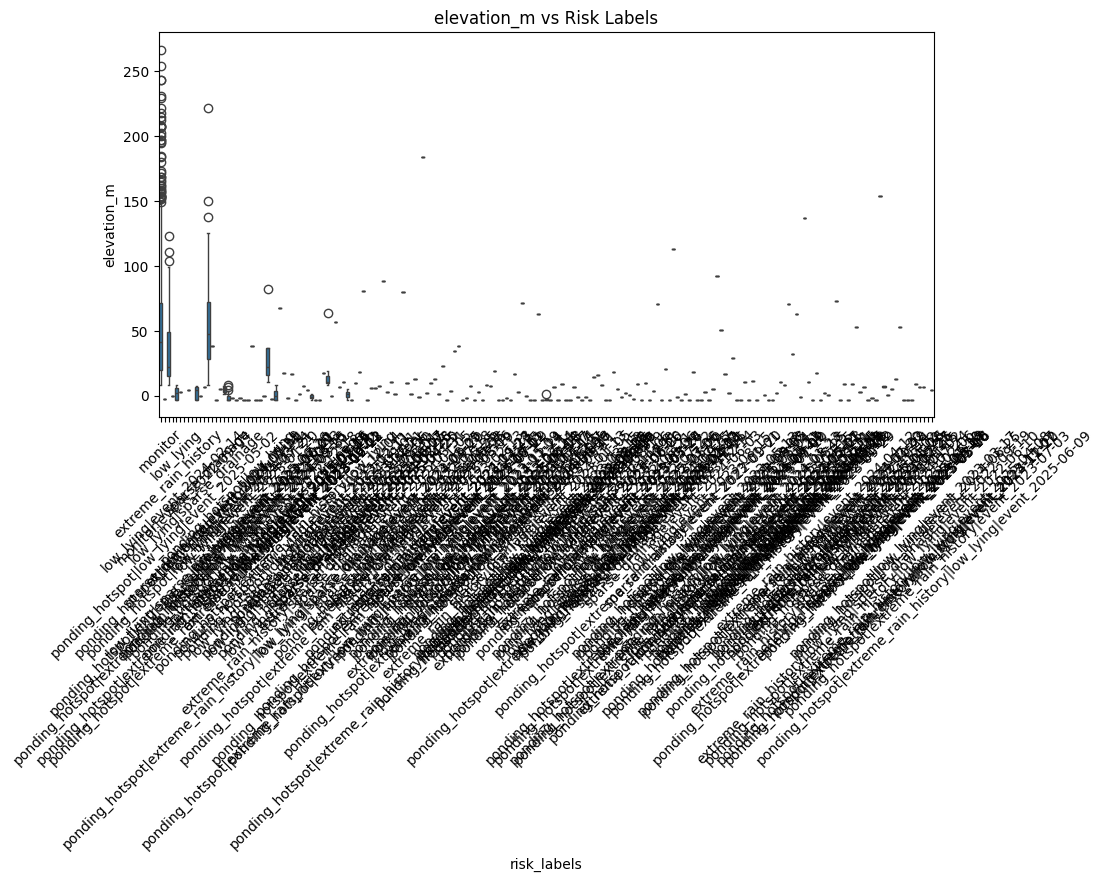

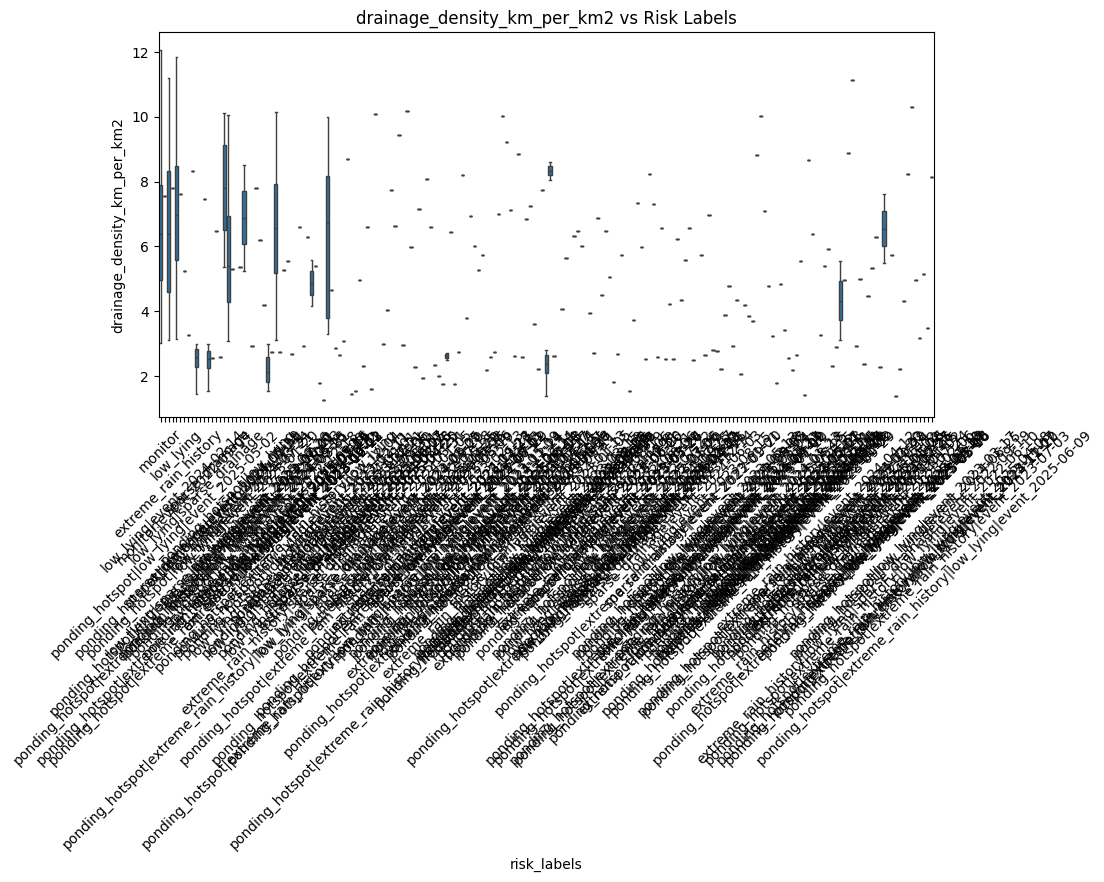

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features (excluding target)
categorical_cols = ['city_name', 'admin_ward', 'dem_source', 'land_use',
                    'soil_group', 'storm_drain_type', 'rainfall_source']

# List of numeric features
numeric_cols = ['latitude', 'longitude', 'elevation_m', 'drainage_density_km_per_km2',
                'storm_drain_proximity_m', 'historical_rainfall_intensity_mm_hr',
                'return_period_years']

# --- 1️⃣ Categorical Features vs Target ---
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue='risk_labels')
    plt.title(f"{col} vs Risk Labels")
    plt.xticks(rotation=45)
    plt.show()

# --- 2️⃣ Numeric Features Distribution by Target ---
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='risk_labels', y=col)
    plt.title(f"{col} vs Risk Labels")
    plt.xticks(rotation=45)
    plt.show()

# --- 3️⃣ Correlation Heatmap (Numeric Features) ---
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns distribution
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.show()

# Categorical columns countplot
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (use only a few numeric columns to avoid overload)
sns.pairplot(df[numeric_cols[:4]])
plt.show()



In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill numeric with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled ✅")


In [ ]:
# Cell 9: Handle missing values
import pandas as pd

# Fill numeric missing values with median
numeric_cols = ['elevation_m', 'drainage_density_km_per_km2', 'storm_drain_proximity_m', 'historical_rainfall_intensity_mm_hr', 'return_period_years']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
categorical_cols = ['soil_group', 'storm_drain_type']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()  # Verify no missing values remain


In [ ]:
# Cell 10: Encode categorical features
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['city_name','admin_ward','catchment_id','dem_source','land_use','soil_group','storm_drain_type','rainfall_source']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode multi-label risk_labels for now as strings
df['risk_labels'] = df['risk_labels'].str.replace('|', ',')  # Replace '|' with ','

df.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (use only a few numeric columns to avoid overload)
sns.pairplot(df[numeric_cols[:4]])
plt.show()


In [ ]:
# Select only relevant numeric features
X = df[[
    "historical_rainfall_intensity_mm_hr",
    "elevation_m",
    "drainage_density_km_per_km2",
    "storm_drain_proximity_m",
    "return_period_years"
]]

y = df["risk_labels"]

# Handle missing values
X = X.fillna(X.median())


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


In [ ]:
import joblib

joblib.dump(model, "best_flood_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Model, Scaler, and Label Encoder saved successfully!")
